In [96]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import random
from IPython.display import clear_output
plt.rcParams['figure.figsize'] = [12, 6]

In [117]:
n = 100
m = 100

landscape = np.ones((n,m))*1.0
landscape[20:23, 20:23] = 3.0
landscape[65:80, 65:80] = 2.0

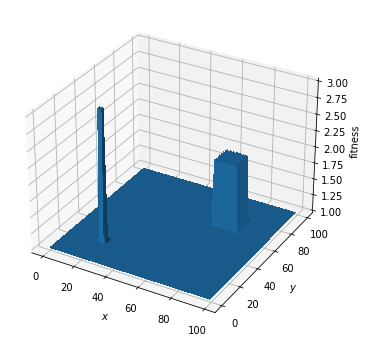

In [118]:
# weird stuff you have to do to make a surface plot
X = np.arange(0,n,1)
Y = np.arange(0,n,1)
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, landscape,
                antialiased=False,
                )
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("fitness")
plt.show()

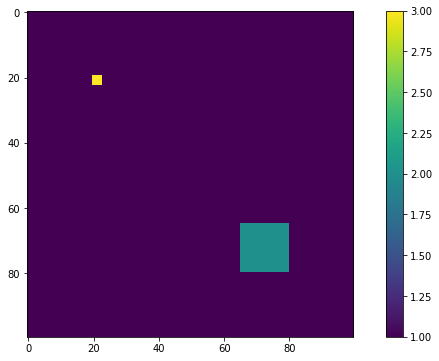

In [119]:
plt.imshow(landscape)
plt.colorbar()
plt.show()

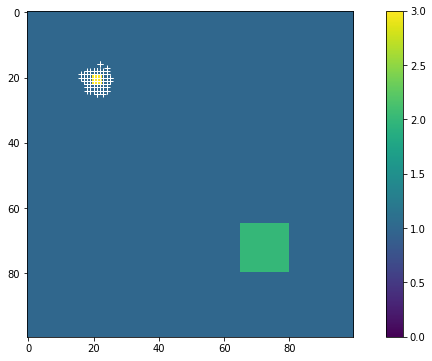

In [127]:
popsize = 1000
mrate = 0.6 # try changing to 0.9

xs = np.random.randint(0,n,popsize)
ys = np.random.randint(0,m,popsize)

def plot_population():
    plt.imshow(landscape, cmap='viridis', vmin=0, vmax=3)
    plt.colorbar()
    plt.plot(xs,ys,'w+')
    plt.show()

def mutate(arr, mrate):
    """mutate an array of integers by adding +1 or -1 to each
    entry, with probability given by mrate"""
    
    array_size = len(arr)
    
    mutations = np.random.randint(0,2,array_size)*2-1 
    # array containing +1 and -1 at random
    
    mutations = mutations * np.random.binomial(1,mrate,array_size)
    # now each entry of mutations contains a 0 
    # with probability 1-mrate

    return arr + mutations
    
def update():
    global xs, ys
    
    ## selection step
    
    # first calculate the fitness of each individual
    fitness = landscape[xs,ys]
    
    # then select popsize individuals proportional to their fitness
    # (by sampling with replacement from the current popuation)
    new_indices = random.choices(
        range(popsize),
        weights=fitness,
        k=popsize
    )

    ## mutation step
    xs = mutate(xs[new_indices], mrate) % n
    ys = mutate(ys[new_indices], mrate) % m
    
for i in range(200):
    update()
    clear_output(wait=True)
    plot_population()

In [81]:
np.random.binomial(1,0.2,10)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [69]:
import sys
sys.version
np.__version__

'1.21.4'